In [16]:
import numpy as np  
import pandas as pd  

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
pet_lic = pd.read_csv("../input/pet-licenses/seattle_pet_licenses.csv")

# set seed for reproducibility
np.random.seed(0)

In [17]:
pet_lic

,animal_s_name,license_issue_date,license_number,primary_breed,secondary_breed,species,zip_code
0,Ozzy,2005-03-29T00:00:00.000,130651.0,"Dachshund, Standard Smooth Haired",NaN,Dog,98104
1,Jack,2009-12-23T00:00:00.000,898148.0,"Schnauzer, Miniature","Terrier, Rat",Dog,98107
2,Ginger,2006-01-20T00:00:00.000,29654.0,"Retriever, Golden","Retriever, Labrador",Dog,98117
3,Pepper,2006-02-07T00:00:00.000,75432.0,Manx,Mix,Cat,98103
4,Addy,2006-08-04T00:00:00.000,729899.0,"Retriever, Golden",NaN,Dog,98105
...,...,...,...,...,...,...,...
66037,Lily,2016-12-27T00:00:00.000,NaN,Domestic Shorthair,Mix,Cat,98117
66038,Ellie,2016-11-29T00:00:00.000,NaN,German Shepherd,Mix,Dog,98105
66039,Sammy,2016-12-05T00:00:00.000,NaN,Terrier,Maltese,Dog,98105
66040,Buddy,2016-12-06T00:00:00.000,NaN,Bullmastiff,Mix,Dog,98105


In [18]:
 pet_lic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66042 entries, 0 to 66041
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   animal_s_name       64685 non-null  object 
 1   license_issue_date  66042 non-null  object 
 2   license_number      43885 non-null  float64
 3   primary_breed       66042 non-null  object 
 4   secondary_breed     22538 non-null  object 
 5   species             66042 non-null  object 
 6   zip_code            65884 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.5+ MB


In [19]:
 pet_lic.primary_breed

0        Dachshund, Standard Smooth Haired
1                     Schnauzer, Miniature
2                        Retriever, Golden
3                                     Manx
4                        Retriever, Golden
                       ...                
66037                   Domestic Shorthair
66038                      German Shepherd
66039                              Terrier
66040                          Bullmastiff
66041                Chihuahua, Short Coat
Name: primary_breed, Length: 66042, dtype: object

In [21]:
gk = pet_lic.groupby('primary_breed')
gk.first()

,animal_s_name,license_issue_date,license_number,secondary_breed,species,zip_code
primary_breed,,,,,,
Abyssinian,Hero,2013-08-08T00:00:00.000,949591.0,Mix,Cat,98117
Affenpinscher,Smiley,2014-12-28T00:00:00.000,905216.0,Mix,Dog,98107
Afghan Hound,Dennie,2014-12-12T00:00:00.000,945883.0,Mix,Dog,98117
Akbash,Vinnie,2016-10-25T00:00:00.000,585928.0,Mix,Dog,98115
Akita,Velvet,2011-04-29T00:00:00.000,213304.0,Newfoundland,Dog,98106
...,...,...,...,...,...,...
"Welsh Corgi, Cardigan",Pippen,2014-04-12T00:00:00.000,895160.0,"Dachshund, Standard Smooth Haired",Dog,98102
"Welsh Corgi, Pembroke",Happy,2013-05-07T00:00:00.000,139280.0,Pomeranian,Dog,98199
Whippet,Wyle,2013-06-26T00:00:00.000,338793.0,"Retriever, Labrador",Dog,98126


In [26]:
# count values in species column
print('Count of Cat:', pet_lic['species'].value_counts()['Cat'])
 
# count values in species column
print('Count of Dog:',pet_lic['species'].value_counts()['Dog'])

Count of Cat: 22915
Count of Dog: 43076


In [27]:
# count all values in name  with relative frequencies
print(pet_lic['primary_breed'].value_counts(normalize=True))

Domestic Shorthair            0.198873
Retriever, Labrador           0.096151
Domestic Medium Hair          0.045728
Retriever, Golden             0.035144
Chihuahua, Short Coat         0.032313
                                ...   
Terrier, Skye                 0.000015
Terrier, American Hairless    0.000015
Braque Francais Gascogne      0.000015
Maremma Sheepdog              0.000015
Azores Cattle Dog             0.000015
Name: primary_breed, Length: 323, dtype: float64


In [43]:
breed_count=pet_lic.groupby('primary_breed').size()
breed_count

primary_breed
Abyssinian                                     58
Affenpinscher                                   8
Afghan Hound                                   15
Akbash                                          3
Akita                                          74
                                             ... 
Welsh Corgi, Cardigan                         270
Welsh Corgi, Pembroke                         372
Whippet                                       117
White Swiss Shepherd (Berger Blanc Suisse)      3
Xoloitzcuintli                                795
Length: 323, dtype: int64

In [30]:
pet_lic.groupby('species').size()

species
Cat          22915
Dog          43076
Livestock       51
dtype: int64

 ## **Normalization**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

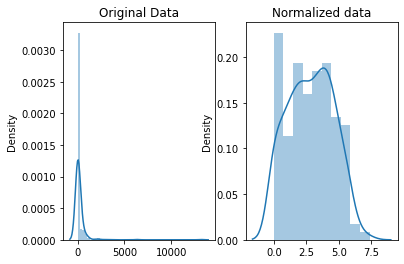

In [45]:
# get the index of all breeds (Box-Cox only takes postive values)
index_of_breeds =breed_count>0

# get only positive breeds (using their indexes)
positive_pledges = breed_count.loc[index_of_breeds]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

 ## **Scaling**

/opt/conda/lib/python3.7/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

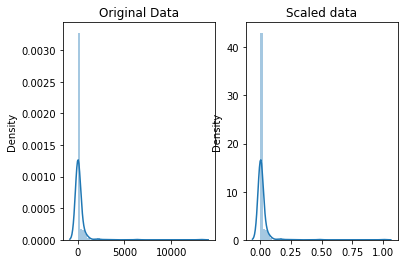

In [46]:
# select the  breed_count column
df1 = breed_count

# scale the goals from 0 to 1
scaled_data = minmax_scaling(df1, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(breed_count, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")